In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings ('ignore')
import pickle

In [4]:
df=pd.read_csv("/content/Salary_Dataset_with_Extra_Features.csv")
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [5]:
df.shape

(22770, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22769 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


**Data Preprocessing**

In [7]:
df.isnull().sum()

,0
Rating,0
Company Name,1
Job Title,0
Salary,0
Salaries Reported,0
Location,0
Employment Status,0
Job Roles,0


In [8]:
# Encoding categorical variables
le =LabelEncoder()
df['Employment Status'] = le.fit_transform(df['Employment Status'])
df['Job Roles'] = le.fit_transform(df['Job Roles'])
df['Location'] = le.fit_transform(df['Location'])
df['Company Name'] = le.fit_transform(df['Company Name'])
df['Job Title'] = le.fit_transform(df['Job Title'])

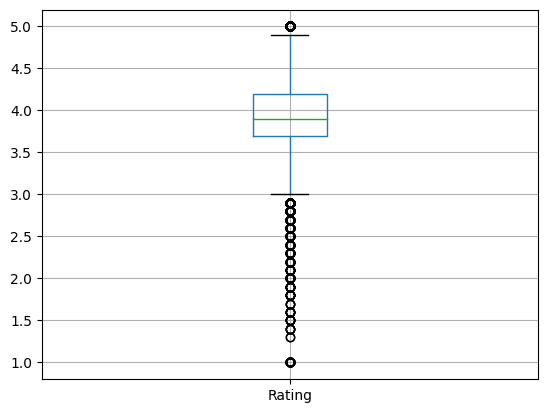

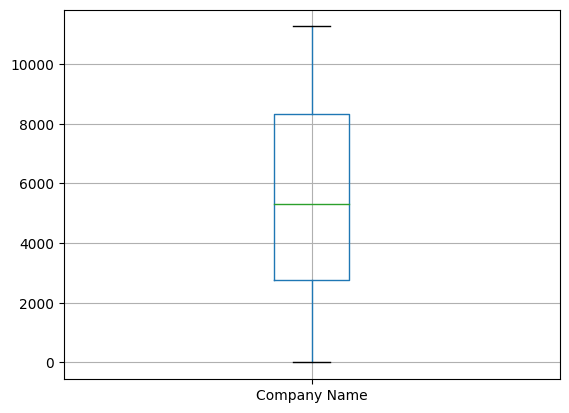

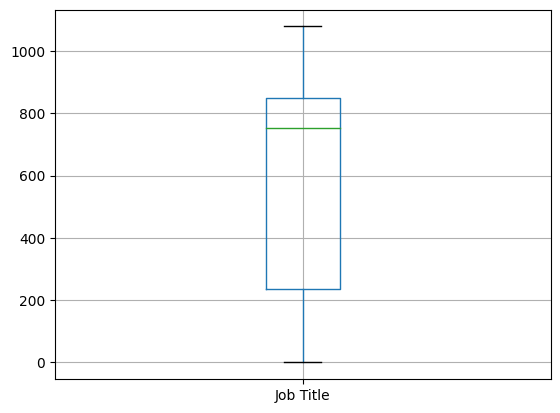

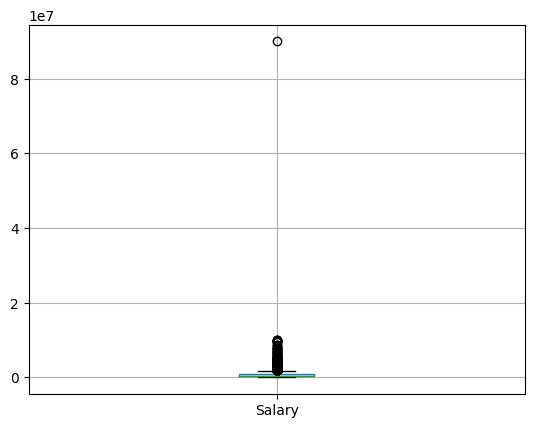

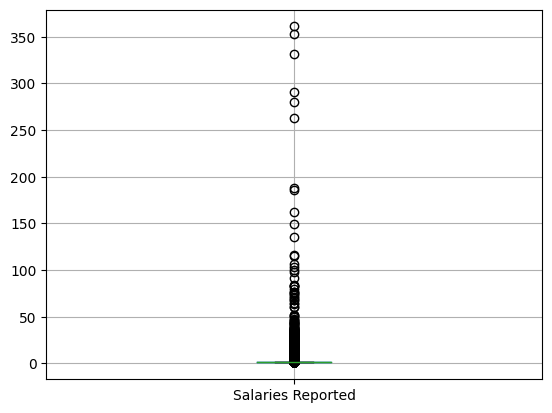

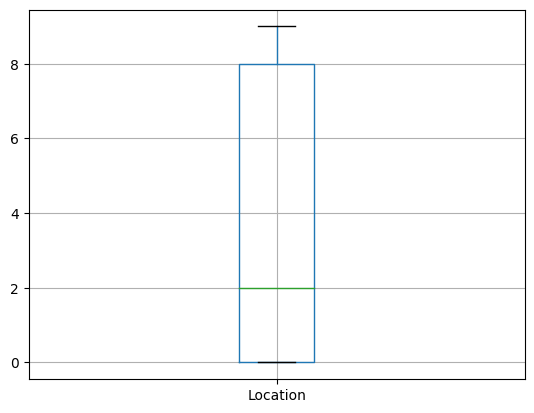

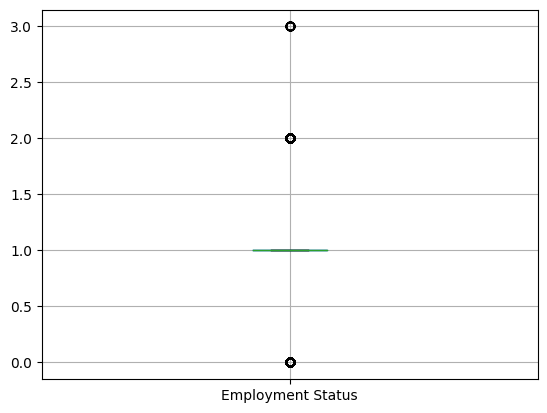

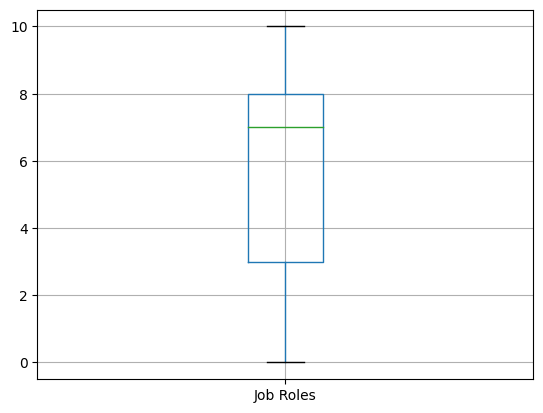

In [9]:
for i in df.columns:
    df[[i]].boxplot()
    plt.show()

In [10]:
df.describe()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
count,22770.000000,22770.000000,22770.000000,2.277000e+04,22770.000000,22770.000000,22770.000000,22770.000000
mean,3.918213,5478.825209,597.435968,6.953872e+05,1.855775,3.150812,1.071322,5.465086
std,0.519675,3224.603280,348.305504,8.843990e+05,6.823668,3.529116,0.342450,3.221968
min,1.000000,0.000000,0.000000,2.112000e+03,1.000000,0.000000,0.000000,0.000000
25%,3.700000,2756.000000,237.000000,3.000000e+05,1.000000,0.000000,1.000000,3.000000
50%,3.900000,5317.500000,753.000000,5.000000e+05,1.000000,2.000000,1.000000,7.000000
75%,4.200000,8336.000000,850.000000,9.000000e+05,1.000000,8.000000,1.000000,8.000000
max,5.000000,11260.000000,1079.000000,9.000000e+07,361.000000,9.000000,3.000000,10.000000


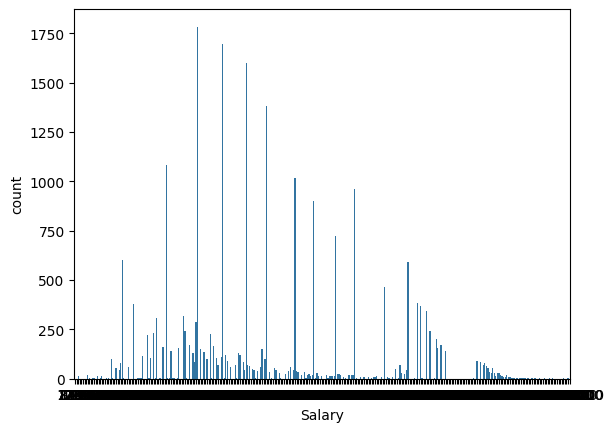

In [11]:
sns.countplot(x='Salary',data=df)
plt.show()

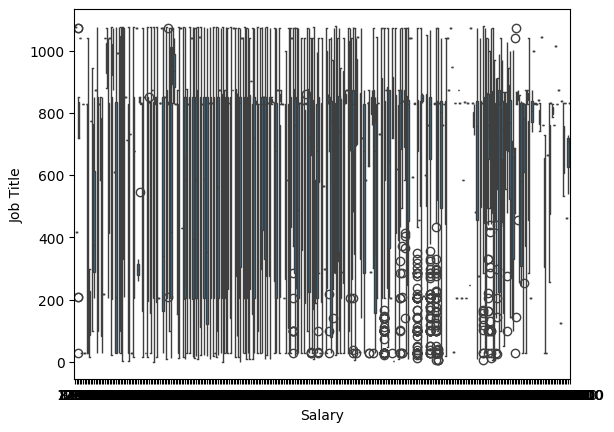

In [12]:
sns.boxplot(x='Salary',y='Job Title', data=df)
plt.show()

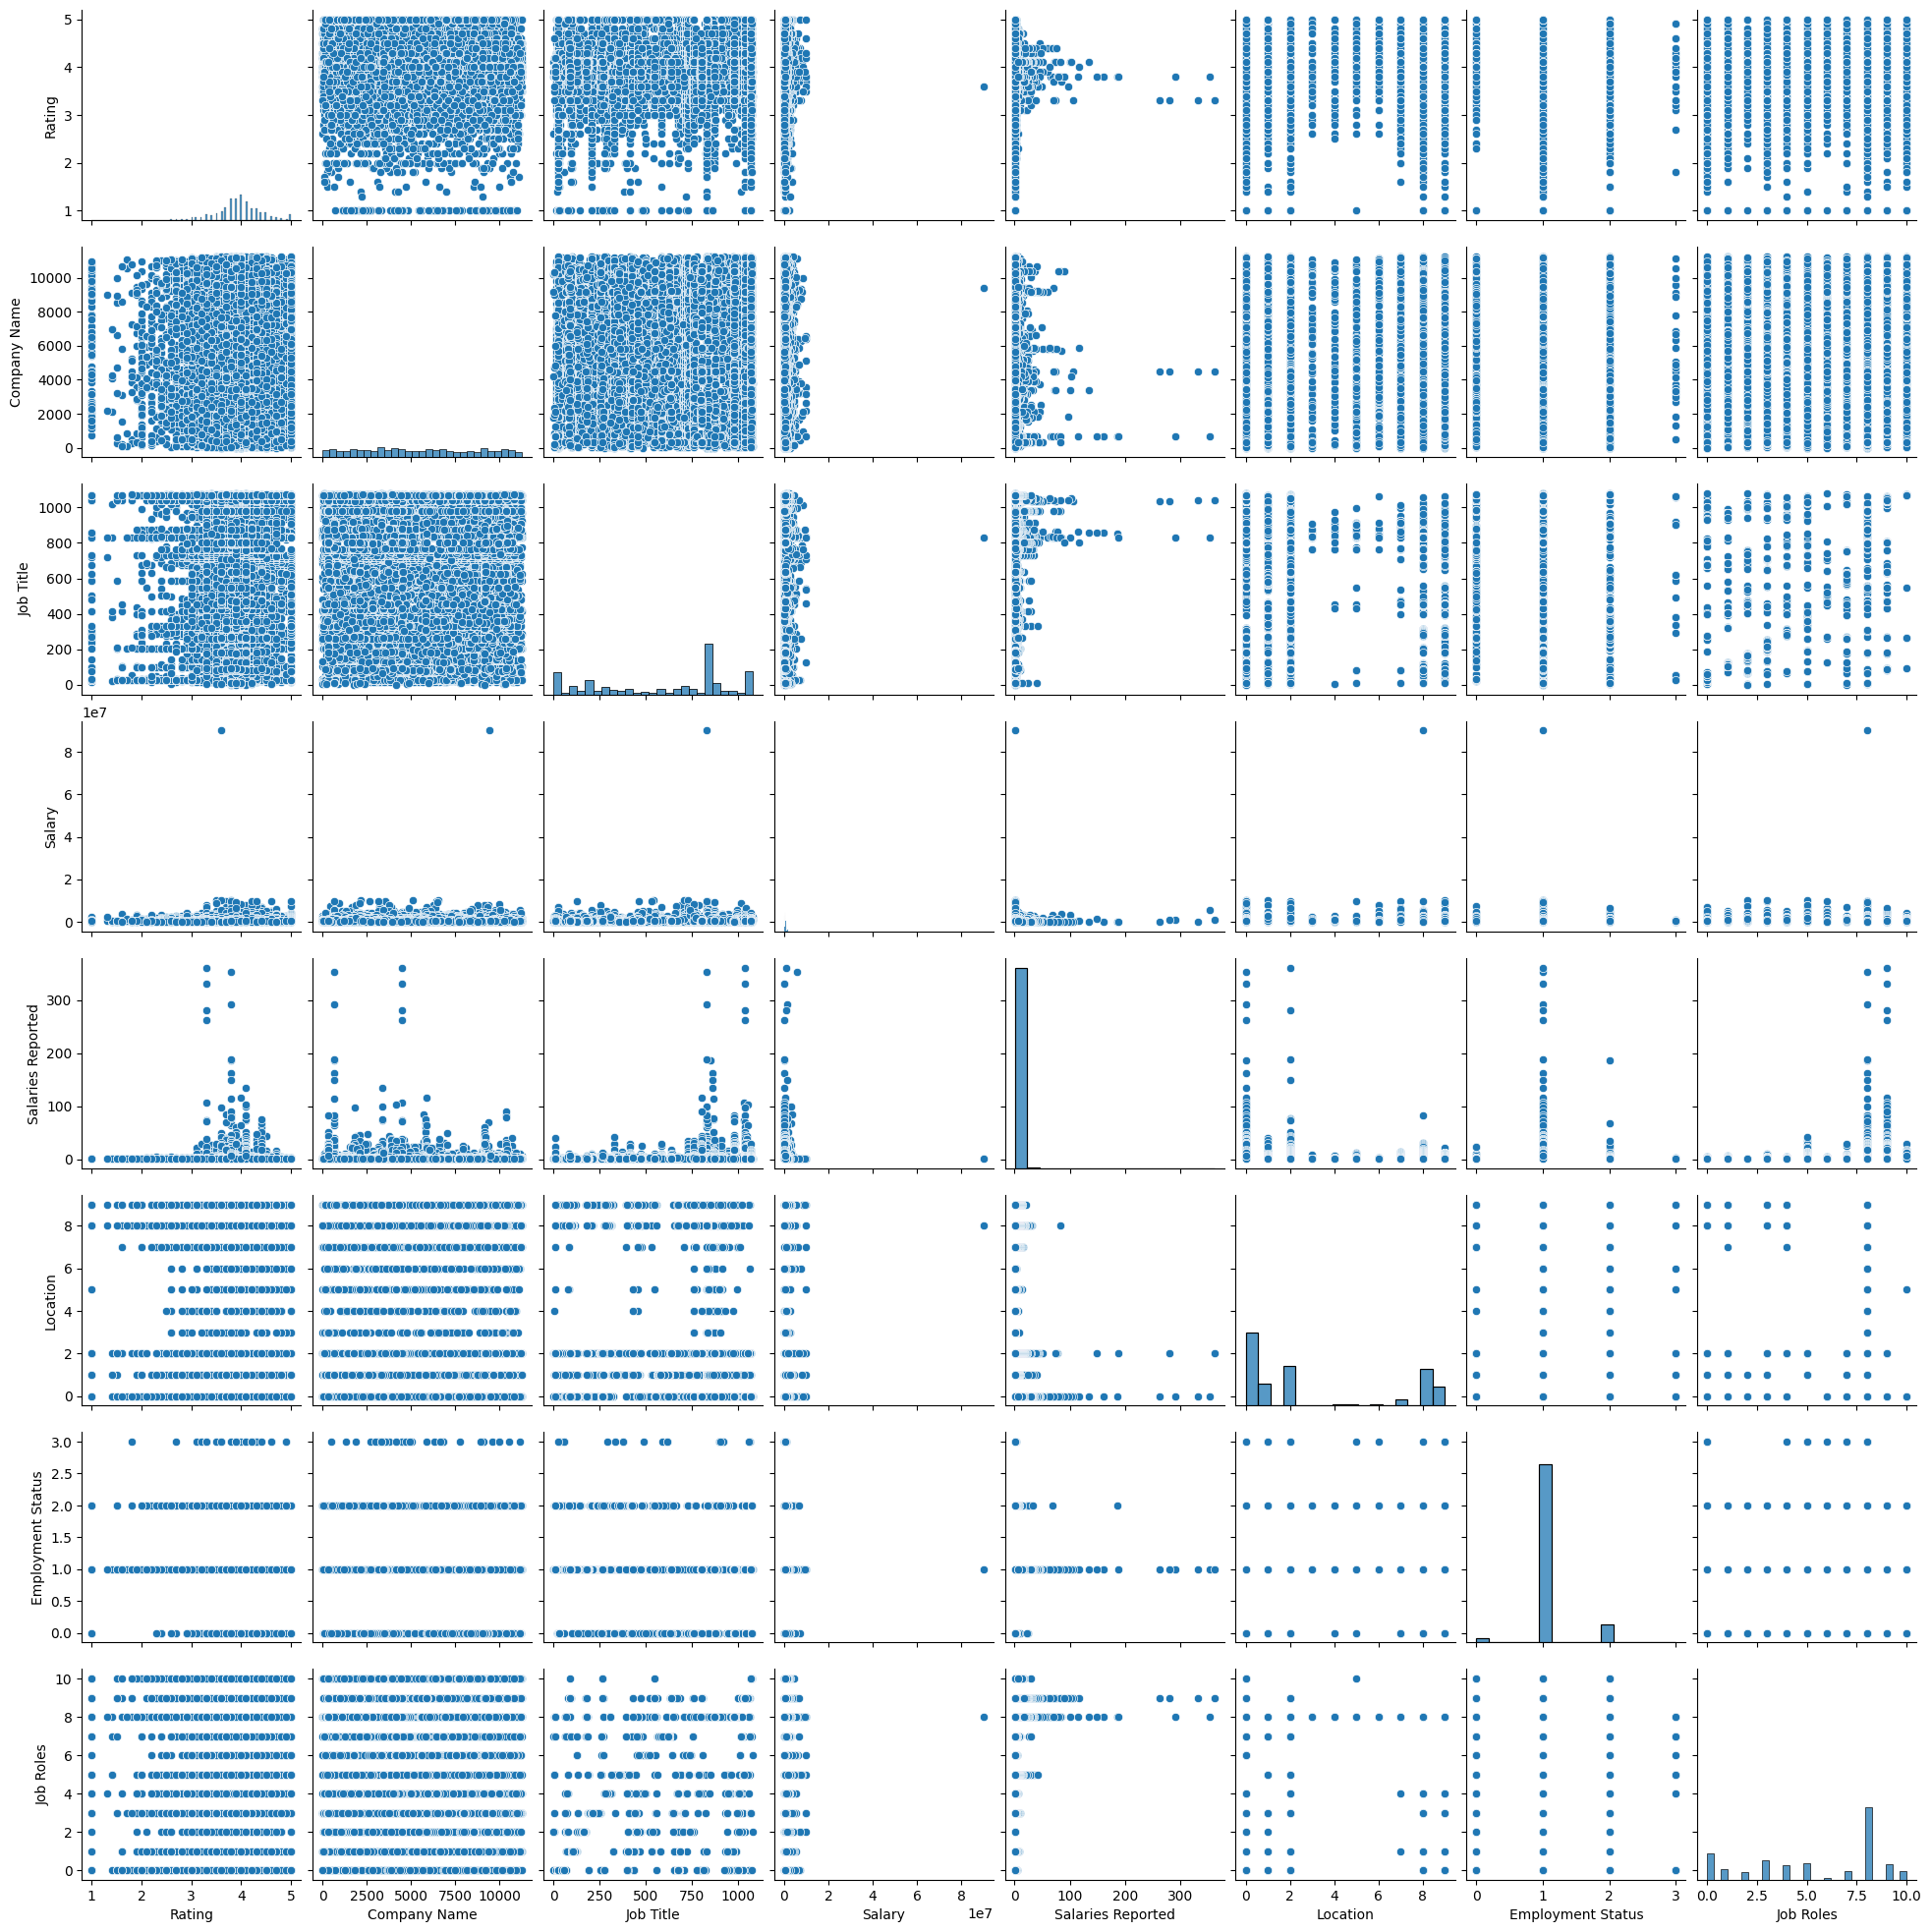

In [13]:
sns.pairplot(df)

In [14]:
X = df.drop(['Salary'], axis=1)
y= df['Salary']

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2, shuffle=True)
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3,random_state = 72)
len(X_train), len(X_test)



(15939, 6831)

In [16]:
len(y_train), len(y_test)


(15939, 6831)

**Decision Tree Model**

In [17]:
dtr= DecisionTreeRegressor(random_state=42)

In [18]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [19]:
y_train_pred = dtr.predict(X_train)
y_train_pred = dtr.predict(X_test)

In [20]:
y_train_pred[:5]


array([ 288000., 2000000.,  600000., 1100000.,  600000.])

//

In [21]:
from sklearn.metrics import r2_score

In [22]:
from sklearn.metrics import mean_squared_error

Decision tree for training data

In [48]:
y_train_pred = dtr.predict(X_train)  # Predict on training data
y_test_pred = dtr.predict(X_test)   # Predict on testing data and assign to a different variable

r2_score(y_train, y_train_pred)*100 # Now compare the predictions on the training set to the true values for the training set

99.88283394123113

mean square error for decision tree on  training data

In [52]:
mean_squared_error(y_train, y_train_pred) # Use y_test_pred (predictions on test data) instead of y_train_pred

1084042732.4052951

decision tree for testing data

In [50]:
r2_score(y_test,y_test_pred)*100

-306.5997015507768

In [51]:
train_r2 = r2_score(y_train, y_train_pred) * 100
print("Training R²",train_r2)

# Calculate and print the R² score for the testing data
test_r2 = r2_score(y_test, y_test_pred) * 100
print("Testing R²: ",test_r2)

Training R² 99.88283394123113
Testing R²:  -306.5997015507768


Mean square error for decision tree on testing data

In [53]:
mean_squared_error(y_test,y_test_pred)

1822545240894.2024

**Random forest Model**

In [54]:
rfr = RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(X_train,y_train)
y_test_pred=rfr.predict(X_test)
y_train_pred=rfr.predict(X_train)


train_r2 = r2_score(y_train, y_train_pred) * 100
print("Training R²:",train_r2)
#Calculate and print the R² score for the testing data
test_r2 = r2_score(y_test, y_test_pred) * 100
print("Testing R²",test_r2)


Training R²: 86.03987604146623
Testing R² 0.19943667460349257


**XG boost model**

In [31]:
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
y_test_pred=xg_reg.predict(X_test)
y_train_pred=xg_reg.predict(X_train)

In [33]:

train_r2 = r2_score(y_train, y_train_pred) * 100
print("Training R²:",train_r2)
#Calculate and print the R² score for the testing data
test_r2 = r2_score(y_test, y_test_pred) * 100
print("Testing R²: ",test_r2)

Training R²: 72.57209200330892
Testing R²:  -99.38207793799099


**Linear Regression Model**

In [34]:
reg= LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [35]:
y_test_pred=reg.predict(X_test)
y_train_pred=reg.predict(X_train)

In [57]:
train_r2 = r2_score(y_train, y_train_pred) * 100
print("Training R²",train_r2)

# Calculate and print the R² score for the testing data
test_r2 = r2_score(y_test, y_test_pred) *100
print("Testing R²: ",test_r2)

Training R² 86.03987604146623
Testing R²:  0.19943667460349257


Testing the model


In [37]:
rfr.predict([[0.7,6422,461,1,0,1,3]])

array([5829560.])

In [40]:
dtr.predict([[0.7,6422,461,1,0,1,3]])

array([9900000.])

In [41]:
xg_reg.predict([[0.7,6422,461,1,0,1,3]])

array([5338370.], dtype=float32)

In [42]:
reg.predict([[0.7,6422,461,1,0,1,3]])

array([567285.92599767])

In [43]:
dtr.predict([[1.2,3412,8042,1,7,1,2]])

array([2200000.])

In [44]:
dtr.predict([[1.8,2342,2218,1021,1,5,2]])

array([800000.])

In [45]:
dtr.predict([[1.8,2342,2218,1021,1,5,2]])

array([800000.])

Performance Testing Compare the Model

In [ ]:

r2_score(y_train,y_train_pred)*100

In [ ]:
mean_squared_error(y_train,y_train_pred)

In [ ]:

r2_score(y_test,y_test_pred)*100

In [ ]:
#Mean square error for training data
mean_squared_error(y_test,y_test_pred)

Model Deployment

In [ ]:
#Save the best model
with open("software Industry Salary prediction.pkl","wb") as f:
    pickle.dump(dtr,f)

Build python code